An Ad- Agency analyzed a dataset of online ads and used a machine learning
model to predict whether a user would click on an ad or not

In [25]:
import pandas as pd
import gzip

In [26]:
input_file = 'train.gz'  # Replace with your .gz file name
output_file = 'train.csv'  # Replace with the desired output file name

with gzip.open(input_file, 'rb') as gz_file:
    with open(output_file, 'wb') as out_file:
        out_file.write(gz_file.read())

print("File extraction completed.")

File extraction completed.


In [27]:
df_train = pd.read_csv("train.csv",nrows=2000)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2000 non-null   uint64
 1   click             2000 non-null   int64 
 2   hour              2000 non-null   int64 
 3   C1                2000 non-null   int64 
 4   banner_pos        2000 non-null   int64 
 5   site_id           2000 non-null   object
 6   site_domain       2000 non-null   object
 7   site_category     2000 non-null   object
 8   app_id            2000 non-null   object
 9   app_domain        2000 non-null   object
 10  app_category      2000 non-null   object
 11  device_id         2000 non-null   object
 12  device_ip         2000 non-null   object
 13  device_model      2000 non-null   object
 14  device_type       2000 non-null   int64 
 15  device_conn_type  2000 non-null   int64 
 16  C14               2000 non-null   int64 
 17  C15           

In [29]:
df_train.nunique()

id                  2000
click                  2
hour                   1
C1                     5
banner_pos             2
site_id              176
site_domain          150
site_category         12
app_id               123
app_domain            19
app_category           8
device_id            241
device_ip           1755
device_model         492
device_type            4
device_conn_type       4
C14                  147
C15                    3
C16                    4
C17                   83
C18                    4
C19                   31
C20                   72
C21                   24
dtype: int64

In [30]:
cat_features = df_train.select_dtypes(include='O')
num_features = df_train.select_dtypes(exclude="O")
cat_features

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24
1,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120
2,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd
3,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a
4,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2
...,...,...,...,...,...,...,...,...,...
1995,97c9ac6a,5baa6f69,f66779e6,ecad2386,7801e8d9,07d7df22,a99f214a,1377e35d,7db0d267
1996,85f751fd,c4e18dd6,50e219e0,d44c074c,ae637522,cef3e649,a99f214a,63777eff,0bcabeaf
1997,85f751fd,c4e18dd6,50e219e0,53de0284,d9b5648e,0f2161f8,a99f214a,ce7cc23e,9b5ce758
1998,85f751fd,c4e18dd6,50e219e0,c73fb408,7801e8d9,07d7df22,c8069988,7ea77b17,7e6190f3


In [31]:
chunksize = 10 ** 6
num_of_chunk = 0
train = pd.DataFrame()

for chunk in pd.read_csv('train.csv',chunksize=chunksize):
    num_of_chunk += 1
    train  = pd.concat([train, chunk.sample(frac=.05, replace=False, random_state=123)], axis=0)
    print('Processing Chunk No. ' + str(num_of_chunk))  
train.reset_index(inplace=True)
train_len = len(train)
train_len

Processing Chunk No. 1
Processing Chunk No. 2
Processing Chunk No. 3
Processing Chunk No. 4
Processing Chunk No. 5
Processing Chunk No. 6
Processing Chunk No. 7
Processing Chunk No. 8
Processing Chunk No. 9
Processing Chunk No. 10
Processing Chunk No. 11
Processing Chunk No. 12
Processing Chunk No. 13
Processing Chunk No. 14
Processing Chunk No. 15
Processing Chunk No. 16
Processing Chunk No. 17
Processing Chunk No. 18
Processing Chunk No. 19
Processing Chunk No. 20
Processing Chunk No. 21
Processing Chunk No. 22
Processing Chunk No. 23
Processing Chunk No. 24
Processing Chunk No. 25
Processing Chunk No. 26
Processing Chunk No. 27
Processing Chunk No. 28
Processing Chunk No. 29
Processing Chunk No. 30
Processing Chunk No. 31
Processing Chunk No. 32
Processing Chunk No. 33
Processing Chunk No. 34
Processing Chunk No. 35
Processing Chunk No. 36
Processing Chunk No. 37
Processing Chunk No. 38
Processing Chunk No. 39
Processing Chunk No. 40
Processing Chunk No. 41


2021448

In [47]:
test_file = 'test.gz'
df  =pd.concat([train,pd.read_csv(test_file,compression='gzip')]).drop(['index', 'id'],axis=1)

In [48]:
df['hour']

0          14102102
1          14102102
2          14102102
3          14102104
4          14102102
             ...   
4577459    14103123
4577460    14103123
4577461    14103123
4577462    14103123
4577463    14103123
Name: hour, Length: 6598912, dtype: int64

In [49]:
def get_date(hour):
    y='20'+str(hour)[:2]
    m = str(hour)[2:4]
    d = str(hour)[4:6]

    return y+'-'+m+'-'+d
df['weekday'] = pd.to_datetime(df.hour.apply(get_date)).dt.dayofweek.astype(str)

def tran_hour(x):
    x = x % 100
    while x in [23,0]:
        return '23-01'
    while x in [1,2]:
        return '01-03'
    while x in [3,4]:
        return '03-05'
    while x in [5,6]:
        return '05-07'
    while x in [7,8]:
        return '07-09'
    while x in [9,10]:
        return '09-11'
    while x in [11,12]:
        return '11-13'
    while x in [13,14]:
        return '13-15'
    while x in [15,16]:
        return '15-17'
    while x in [17,18]:
        return '17-19'
    while x in [19,20]:
        return '19-21'
    while x in [21,22]:
        return '21-23'

df['hour'] = df.hour.apply(tran_hour)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6598912 entries, 0 to 4577463
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   click             float64
 1   hour              object 
 2   C1                int64  
 3   banner_pos        int64  
 4   site_id           object 
 5   site_domain       object 
 6   site_category     object 
 7   app_id            object 
 8   app_domain        object 
 9   app_category      object 
 10  device_id         object 
 11  device_ip         object 
 12  device_model      object 
 13  device_type       int64  
 14  device_conn_type  int64  
 15  C14               int64  
 16  C15               int64  
 17  C16               int64  
 18  C17               int64  
 19  C18               int64  
 20  C19               int64  
 21  C20               int64  
 22  C21               int64  
 23  weekday           object 
dtypes: float64(1), int64(12), object(11)
memory usage: 1.2+ GB


In [51]:
len_of_feature_count = []
for i in df.columns[2:23].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    len_of_feature_count.append(len(df[i].astype(str).value_counts()))

C1 : 7
banner_pos : 7
site_id : 3496
site_domain : 4333
site_category : 24
app_id : 5466
app_domain : 319
app_category : 31
device_id : 552856
device_ip : 1875405
device_model : 6321
device_type : 5
device_conn_type : 4
C14 : 2662
C15 : 8
C16 : 9
C17 : 470
C18 : 4
C19 : 68
C20 : 169
C21 : 62


In [52]:
need_tran_feature = df.columns[2:4].tolist()+df.columns[13:23].tolist()

for i in need_tran_feature:
    df[i] = df[i].astype(str)

obj_features = []

for i in range(len(len_of_feature_count)):
    if len_of_feature_count[i]>10:
        obj_features.append(df.columns[2:23].tolist()[i])
obj_features

['site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'C14',
 'C17',
 'C19',
 'C20',
 'C21']

In [53]:
df_describe = df.describe()
df_describe

,click
count,2.021448e+06
mean,1.700731e-01
std,3.756971e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [54]:
df.head(5)

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday
0,1.0,01-03,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,...,0,17753,320,50,1993,2,1063,-1,33,1
1,0.0,01-03,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15699,320,50,1722,0,35,100083,79,1
2,0.0,01-03,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15703,320,50,1722,0,35,100083,79,1
3,0.0,03-05,1005,1,b8eae5f9,1e334bd3,f028772b,ecad2386,7801e8d9,07d7df22,...,0,19950,320,50,1800,3,167,100077,23,1
4,0.0,01-03,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15701,320,50,1722,0,35,-1,79,1


In [55]:
def obj_clean(X):

    def get_click_rate(x):
        
        temp = train[train[X.columns[0]] == x]
        res = round((temp.click.sum() / temp.click.count()),3)
        return res

    def get_type(V, str):
        
        very_high = df_describe.loc['mean','click'] + 0.04
        higher = df_describe.loc['mean','click'] + 0.02
        lower = df_describe.loc['mean','click'] - 0.02
        very_low = df_describe.loc['mean','click'] - 0.04

        vh_type = V[V[str] > very_high].index.tolist()
        hr_type = V[(V[str] > higher) & (V[str] < very_high)].index.tolist()
        vl_type = V[V[str] < very_low].index.tolist()
        lr_type = V[(V[str] < lower) & (V[str] > very_low)].index.tolist()

        return vh_type, hr_type, vl_type, lr_type

    def clean_function(x):
        
        while x in type_[0]:
            return 'very_high'
        while x in type_[1]:
            return 'higher'
        while x in type_[2]:
            return 'very_low'
        while x in type_[3]:
            return 'lower'
        return 'mid'
        
    print('Run: ', X.columns[0])
    fq = X[X.columns[0]].value_counts()
    
    if len(fq) > 1000:
        fq = fq[:1000]

    fq = pd.DataFrame(fq)
    fq['new_column'] = fq.index    
    fq['click_rate'] = fq.new_column.apply(get_click_rate)
    type_ = get_type(fq, 'click_rate')
    return X[X.columns[0]].apply(clean_function)

df1= pd.DataFrame()

for i in obj_features:  
    df1[i] = obj_clean(df[[i]])
  
    df[i] = obj_clean(df[[i]])

df

Run:  site_id
Run:  site_domain
Run:  site_category
Run:  app_id
Run:  app_domain
Run:  app_category
Run:  device_id
Run:  device_ip
Run:  device_model
Run:  C14
Run:  C17
Run:  C19
Run:  C20
Run:  C21


,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday
0,1.0,01-03,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,...,0,17753,320,50,1993,2,1063,-1,33,1
1,0.0,01-03,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15699,320,50,1722,0,35,100083,79,1
2,0.0,01-03,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15703,320,50,1722,0,35,100083,79,1
3,0.0,03-05,1005,1,b8eae5f9,1e334bd3,f028772b,ecad2386,7801e8d9,07d7df22,...,0,19950,320,50,1800,3,167,100077,23,1
4,0.0,01-03,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15701,320,50,1722,0,35,-1,79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,NaN,23-01,1005,0,93eaba74,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,0,17654,300,250,1994,2,39,-1,33,4
4577460,NaN,23-01,1005,0,17d1b03f,f3845767,f028772b,ecad2386,7801e8d9,07d7df22,...,0,22104,320,50,2545,0,431,100084,221,4
4577461,NaN,23-01,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,0,17654,300,250,1994,2,39,-1,33,4
4577462,NaN,23-01,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,...,3,23857,320,50,2734,1,175,100189,71,4


In [65]:
df

,click,hour,C1,banner_pos,device_type,device_conn_type,C15,C16,C18,weekday,...,app_domain,app_category,device_id,device_ip,device_model,C14,C17,C19,C20,C21
0,1.0,01-03,1005,1,1,0,320,50,2,1,...,higher,higher,mid,very_high,higher,mid,mid,mid,mid,mid
1,0.0,01-03,1005,0,1,0,320,50,0,1,...,higher,higher,mid,mid,higher,mid,mid,mid,mid,mid
2,0.0,01-03,1005,0,1,0,320,50,0,1,...,higher,higher,mid,mid,lower,mid,mid,mid,mid,mid
3,0.0,03-05,1005,1,1,0,320,50,3,1,...,higher,higher,mid,mid,lower,mid,mid,mid,mid,mid
4,0.0,01-03,1005,0,1,0,320,50,0,1,...,higher,higher,mid,mid,very_high,mid,mid,mid,mid,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,NaN,23-01,1005,0,1,0,300,250,2,4,...,higher,higher,mid,mid,very_high,mid,mid,mid,mid,mid
4577460,NaN,23-01,1005,0,1,0,320,50,0,4,...,higher,higher,mid,mid,very_high,mid,mid,mid,mid,mid
4577461,NaN,23-01,1005,0,1,0,300,250,2,4,...,higher,higher,mid,mid,mid,mid,mid,mid,mid,mid
4577462,NaN,23-01,1005,0,1,3,320,50,1,4,...,very_low,very_low,mid,mid,very_low,mid,mid,mid,mid,mid


In [64]:
# df1_columns = df1.columns
# df.drop(columns=df1_columns, inplace =True)
# df = pd.concat([df,df1],axis=1)

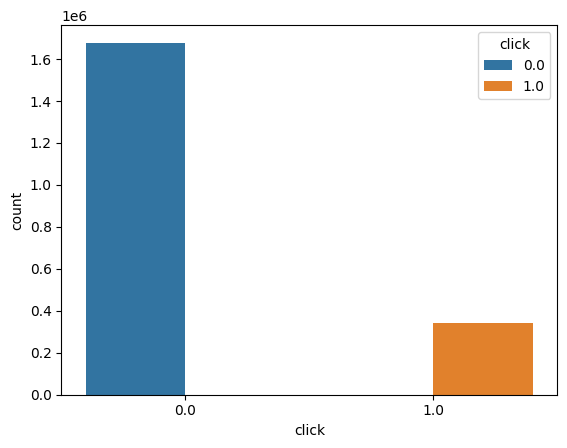

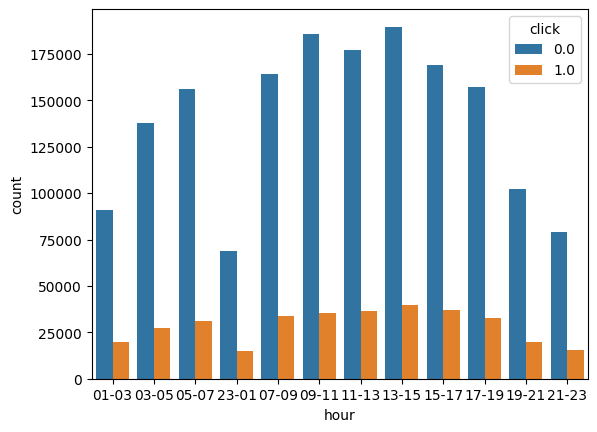

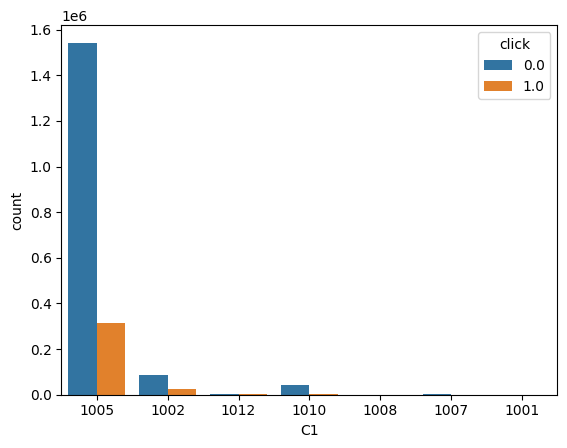

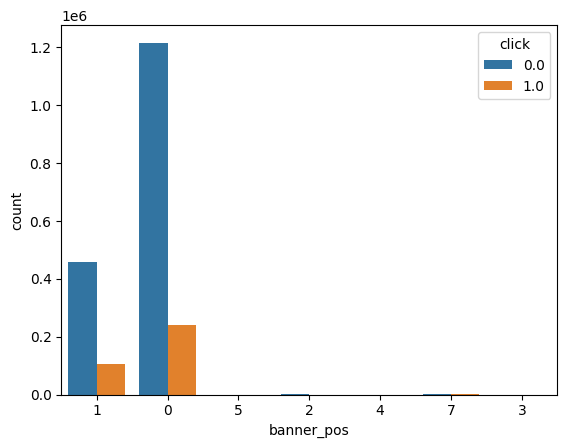

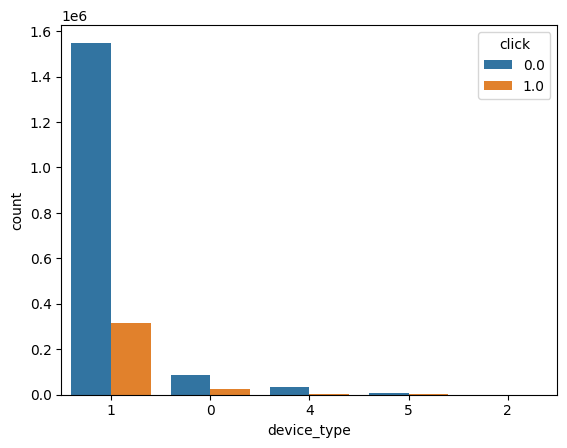

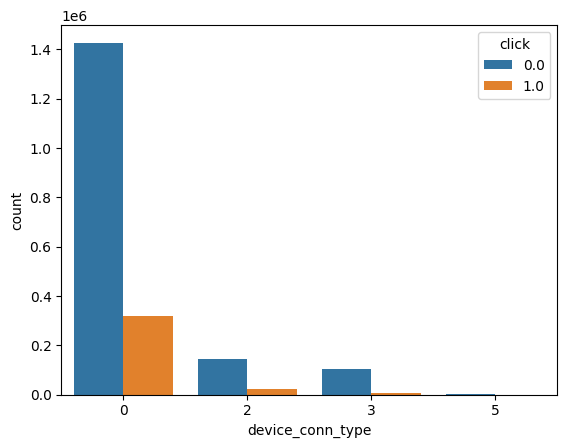

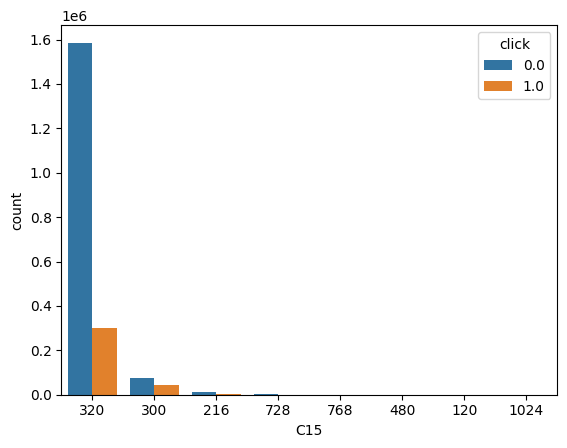

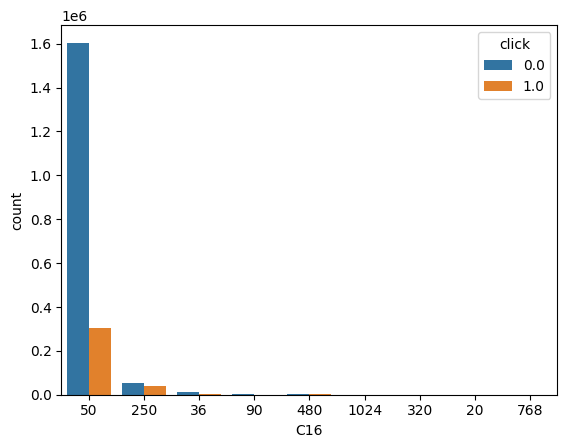

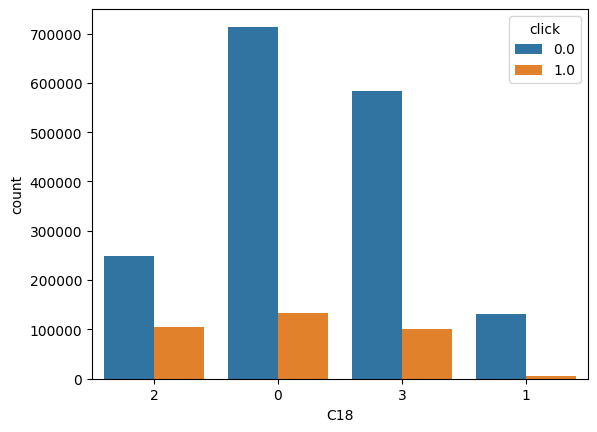

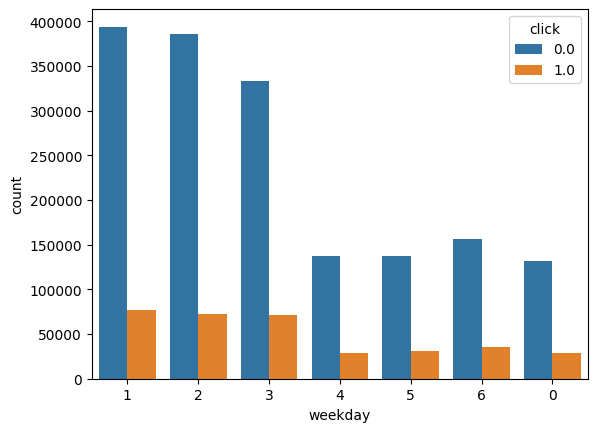

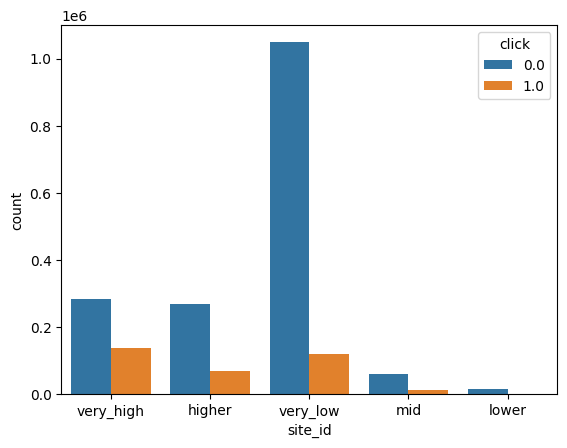

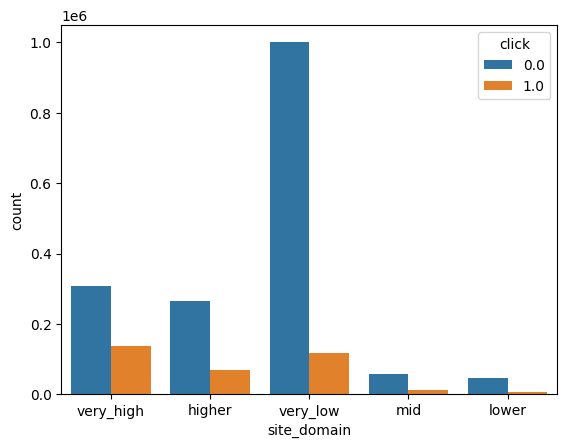

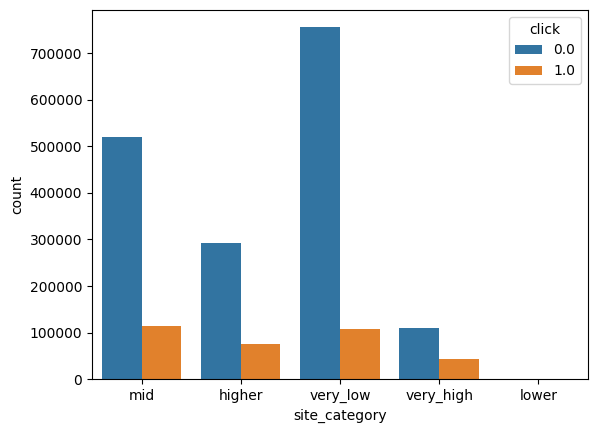

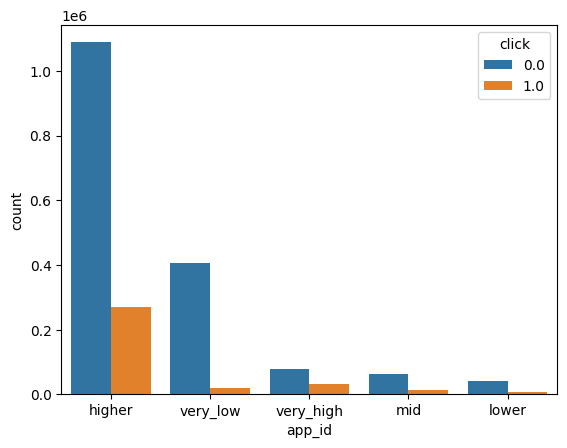

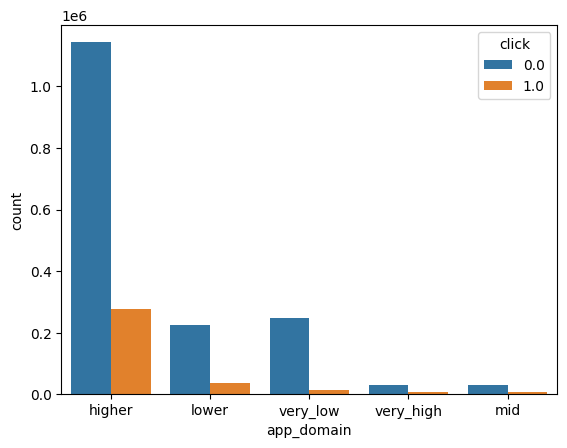

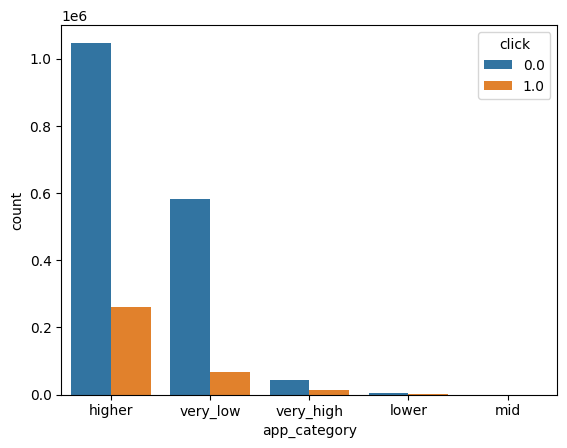

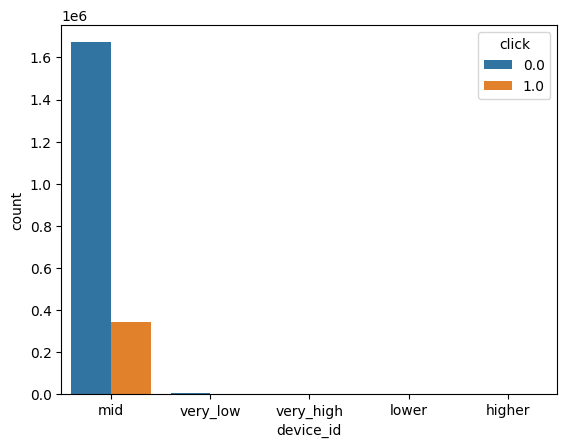

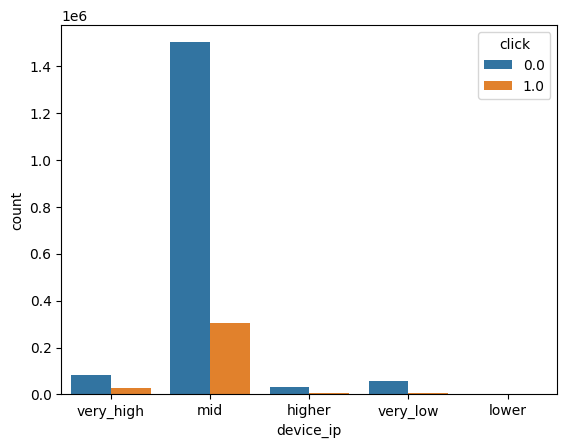

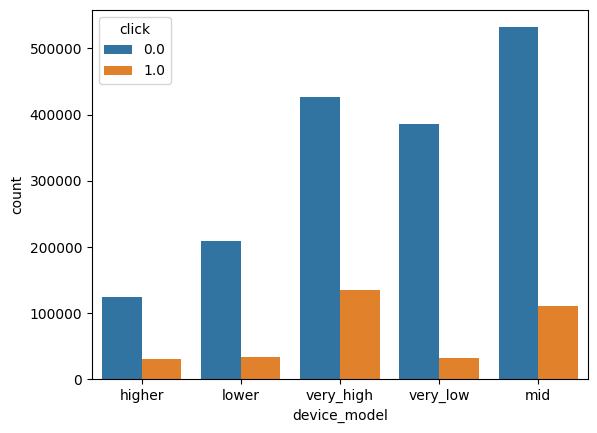

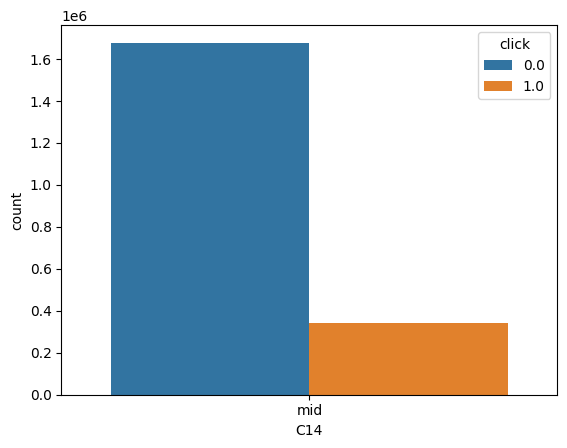

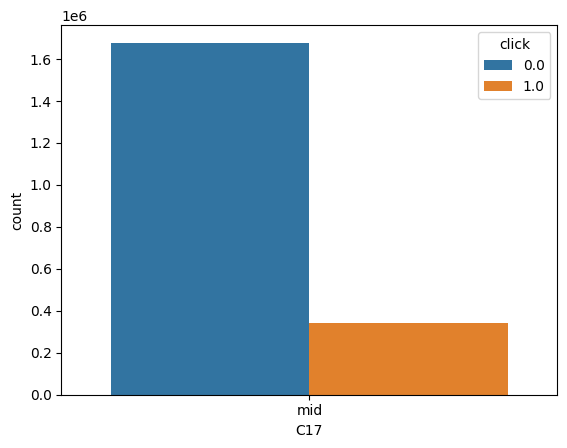

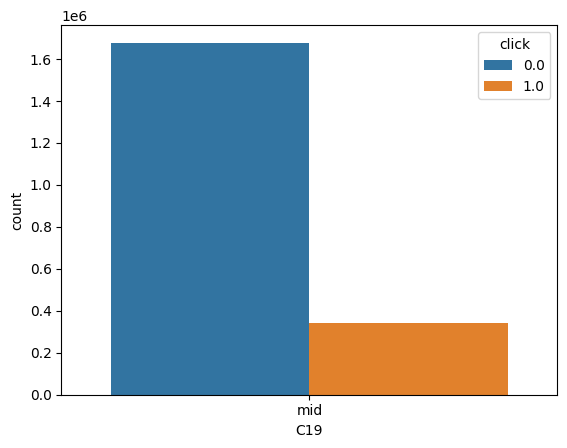

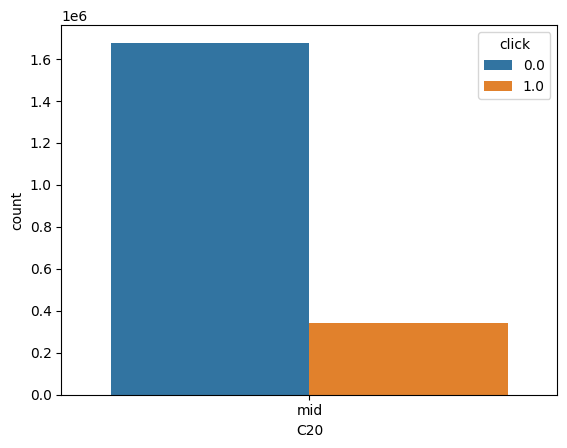

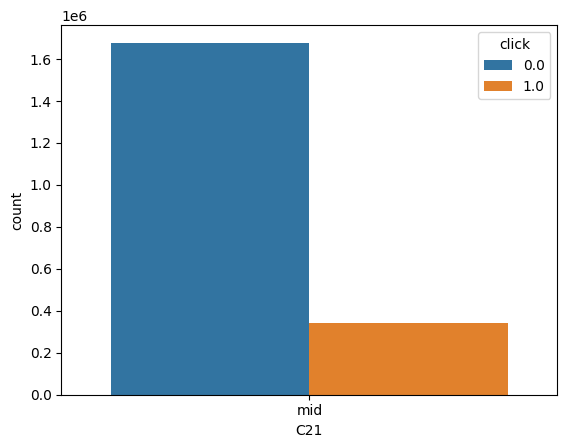

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.columns:
    sns.countplot(x = i, hue = "click", data = df)
    plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, roc_curve,auc, precision_recall_fscore_support

df2 = df.copy()
df.drop(['device_id', 'C14', 'C17', 'C19', 'C20', 'C21'], axis=1, inplace=True)
df = pd.get_dummies(df)
train = df[:train_len]
test = df[train_len:]

train = train[:5000]
test = test[:1000]
pre_X = train[train['click'] == 0].sample(n=len(train[train['click'] == 1]), random_state=111)
pre_X = pd.concat([pre_X, train[train['click'] == 1]]).sample(frac=1)
pre_y = pre_X[['click']]
pre_X.drop(['click'], axis=1, inplace=True)
test.drop(['click'], axis=1, inplace=True)


pre_X_train, pre_X_test, pre_y_train, pre_y_test = train_test_split(pre_X, pre_y, test_size=0.20, stratify=pre_y, random_state=1)
params = {"criterion":["gini", "entropy"], "max_depth":range(1,20)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='roc_auc', cv=100, verbose=1, n_jobs=-1)
grid_search.fit(pre_X_train, pre_y_train)
grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

Fitting 100 folds for each of 38 candidates, totalling 3800 fits


(0.6983928571428573,
 DecisionTreeClassifier(criterion='entropy', max_depth=5),
 {'criterion': 'entropy', 'max_depth': 5})

In [68]:
tree = grid_search.best_estimator_
tree.fit(pre_X,pre_y)

feature_importances = pd.DataFrame(tree.feature_importances_)
feature_importances.index = pre_X_train.columns
feature_importances = feature_importances.sort_values(0,ascending=False)
feature_importances

,0
site_id_very_low,0.365291
app_id_very_high,0.132259
app_id_very_low,0.073037
site_id_mid,0.054803
C18_2,0.051128
...,...
device_conn_type_2,0.000000
device_conn_type_0,0.000000
device_type_5,0.000000
device_type_4,0.000000


In [69]:
pre_X_train = pre_X_train[feature_importances.index[:int(len(feature_importances)/3)]]
pre_X_test = pre_X_test[feature_importances.index[:int(len(feature_importances)/3)]]

params = {"criterion":["gini", "entropy"], "max_depth":range(1,12)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='roc_auc', cv=100, verbose=1, n_jobs=-1)
grid_search.fit(pre_X_train, pre_y_train)
grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

Fitting 100 folds for each of 22 candidates, totalling 2200 fits


(0.7086706349206351,
 DecisionTreeClassifier(max_depth=5),
 {'criterion': 'gini', 'max_depth': 5})

In [70]:
pre_X = pre_X[feature_importances.index[:int(len(feature_importances)/3)]]

tree = grid_search.best_estimator_
tree.fit(pre_X,pre_y)
feature_importances = pd.DataFrame(tree.feature_importances_)
feature_importances.index = pre_X_train.columns
feature_importances = feature_importances.sort_values(0,ascending=False)
feature_importances

,0
site_id_very_low,0.395164
app_id_very_high,0.138469
app_id_very_low,0.062984
banner_pos_1,0.059694
site_id_mid,0.058461
C18_2,0.049729
C18_1,0.043591
app_category_higher,0.035916
device_model_lower,0.020940
hour_03-05,0.019442


Roc_auc_score:  59.679202090849756 %


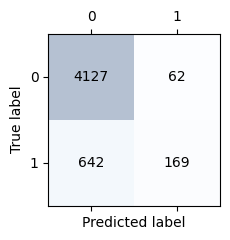

In [71]:


feature_len = len(feature_importances[feature_importances[feature_importances.columns[0]] > 0.005])

y = train[['click']]
X = train[feature_importances[:feature_len].index]
test = test[feature_importances[:feature_len].index]

model = XGBClassifier(tree_method = 'gpu_hist', n_jobs=-1, n_estimators=500, max_depth=11)
model.fit(X,y.values.ravel())
y_pred = model.predict(X)
print("Roc_auc_score: ",roc_auc_score(y,y_pred)*100,"%")

confmat = confusion_matrix(y_true=y, y_pred=y_pred, labels=[0, 1])

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

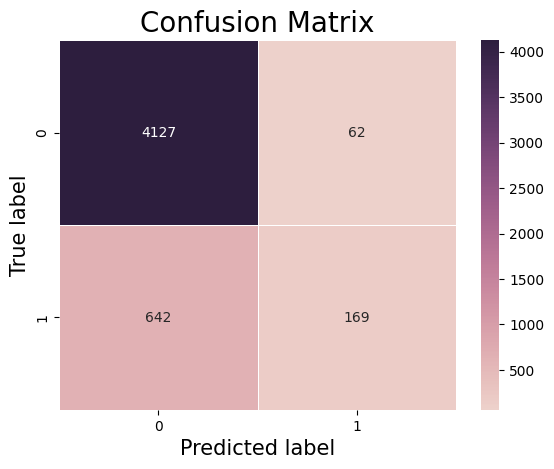

<Figure size 6000x6000 with 0 Axes>

In [72]:
import seaborn as sns
sns.heatmap(confmat,annot=True,fmt='',xticklabels=[0,1],yticklabels=[0,1],linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))

plt.xlabel('Predicted label',fontsize=15)
plt.ylabel('True label',fontsize=15)
plt.title('Confusion Matrix',fontsize=20)
plt.figure(figsize=(30.0,30.0),dpi=200)
plt.tight_layout()
plt.show()

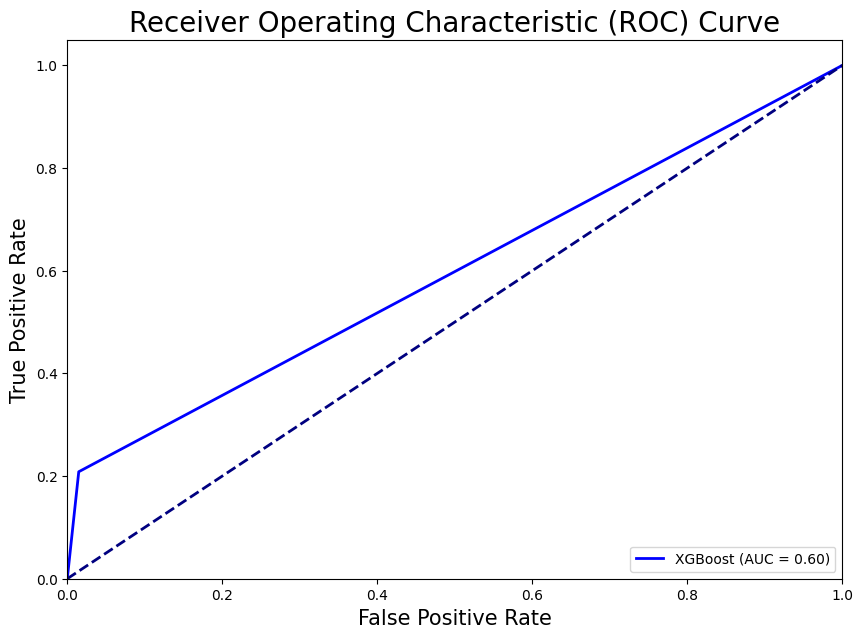

In [73]:
# Plot ROC curve for each model

fpr3, tpr3, _ = roc_curve(y, y_pred)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(10,7))
plt.plot(fpr3, tpr3, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [74]:
print(precision_recall_fscore_support(y, y_pred , average='macro'))
cm=confusion_matrix(y, y_pred)
total1=sum(sum(cm))
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
F1_score = f1_score(y, y_pred)
print('F1 Score : ', F1_score)

(0.7984911572665818, 0.5967920209084977, 0.6228936144318614, None)
Accuracy :  0.8592
Sensitivity :  0.9851993315827167
Specificity :  0.20838471023427868
F1 Score :  0.3243761996161229
